## imports

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
#Keras imports
import tensorflow as tf
import tensorflow.keras.preprocessing as preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

Using TensorFlow backend.


In [19]:
#!pip install lime
#import sklearn
import lime 
from lime import lime_image
from sklearn.preprocessing import LabelEncoder
import glob

## pathways

In [3]:
not_path = os.listdir("../Data/Images")
not_path.remove(".DS_Store") #it likes to pop up from time to time
path_to_data = "../Data"

data_path = os.path.join('..', 'Data')

# test_path = os.path.join(data_path, 'test_images_3')
# train_path = os.path.join(data_path, 'train_images_3')
# val_path = os.path.join(data_path, 'val_images_3')


# images_path = os.path.join(data_path, 'Images')
# image_folders = os.listdir(images_path)
# test_folders = os.listdir(test_path)
# train_folders = os.listdir(train_path)
# val_folders = os.listdir(val_path)

In [4]:
train_dir = os.path.join(data_path, 'ExModeling_train')
test_dir = os.path.join(data_path, 'ExModeling_test')
val_dir = os.path.join(data_path, 'ExModeling_val')

## vis method

In [5]:
#from https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7
#had to tweak some things to get it to work
def vis_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

## modeling part 2

This time I'm starting with only 2 breeds, the Afgan Hound and the Maltese Dog, as they have the most images

In [10]:
img_size = 150
bch_size = 20

In [11]:
img_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

train_generator = img_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical')

validation_generator = img_gen.flow_from_directory(
    val_dir, 
    target_size=(img_size, img_size), 
    color_mode='rgb',
    batch_size=bch_size, 
    class_mode='categorical')

test_generator = img_gen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    color_mode='rgb',
    batch_size=bch_size,
    class_mode='categorical',
    shuffle=False)


Found 441 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


This is the same as model_e from first notebook, but with less classes that contain more images

In [12]:
model_1 = models.Sequential() 
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer =tf.keras.regularizers.l1( l=0.01) ))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(64, activation='relu'))
model_1.add(layers.Dense(128, activation='relu',))
model_1.add(layers.Dense(2, activation='softmax'))

model_1.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10, 
    validation_data=validation_generator,
    validation_steps=50)

W0820 11:45:16.672187 4449635776 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 11:45:16.788094 4449635776 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 11:45:16.820133 4449635776 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 11:45:16.933185 4449635776 deprecation_wrapper.py:119] From /Users/adamroth/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.m

Epoch 1/10
100/100 [==============================] - 318s 3s/step - loss: 46.4509 - acc: 0.6736 - val_loss: 34.1782 - val_acc: 0.8800
Epoch 2/10
100/100 [==============================] - 231s 2s/step - loss: 25.2242 - acc: 0.7805 - val_loss: 17.1313 - val_acc: 0.7778
Epoch 3/10
100/100 [==============================] - 229s 2s/step - loss: 11.4096 - acc: 0.8295 - val_loss: 6.6181 - val_acc: 0.7778
Epoch 4/10
100/100 [==============================] - 218s 2s/step - loss: 3.8184 - acc: 0.8151 - val_loss: 1.8861 - val_acc: 0.8267
Epoch 5/10
100/100 [==============================] - 196s 2s/step - loss: 1.4410 - acc: 0.8171 - val_loss: 1.2272 - val_acc: 0.7304
Epoch 6/10
100/100 [==============================] - 192s 2s/step - loss: 1.0305 - acc: 0.8291 - val_loss: 1.1182 - val_acc: 0.8252
Epoch 7/10
100/100 [==============================] - 190s 2s/step - loss: 0.8365 - acc: 0.8589 - val_loss: 0.7964 - val_acc: 0.8474
Epoch 8/10
100/100 [==============================] - 196s 2s/st

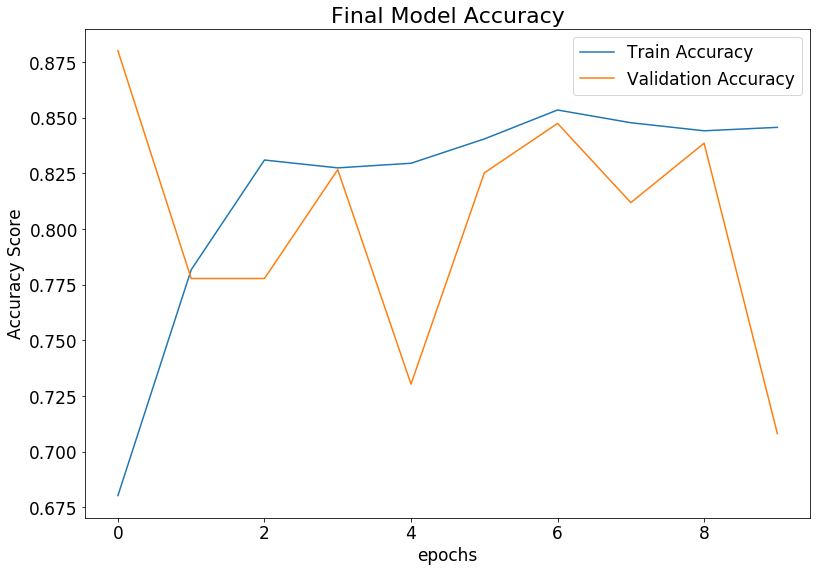

In [14]:

fig, ax = plt.subplots(figsize=(13,9))
ax.set_title('Final Model Accuracy', fontsize = 22)
ax.plot(history_1.epoch, history_1.history["acc"], label="Train Accuracy")
ax.plot(history_1.epoch, history_1.history["val_acc"], label="Validation Accuracy")
plt.xlabel('epochs', fontsize = 17)
plt.ylabel('Accuracy Score', fontsize = 17)
ax.tick_params(axis = 'both', labelsize = 17)
ax.legend(fontsize = 17)

I'm feeling pretty satisfied with this one. I'm running short on time so for now, this is the final model

## Evaluation

In [15]:
test_loss, test_acc = model_1.evaluate_generator(test_generator, steps=50)

In [16]:
print(test_acc, test_loss)

0.8452173963837002 0.7925125012190446


New stuff

In [26]:
# !pip install opencv-python
# import cv2

     |████████████████████████████████| 52.2MB 24.3MB/s eta 0:00:01   |                                | 143kB 2.3MB/s eta 0:00:23     |██▋                             | 4.3MB 2.3MB/s eta 0:00:21


In [ ]:
# img = cv2.imread('../Data/ExModleing_test/Afghan_hound/)
# img = cv2.imread('../Data/ExModleing_test/Afghan_hound/)
# img = cv2.imread('../Data/ExModleing_test/Afghan_hound/)
# img = cv2.imread('../Data/ExModleing_test/Afghan_hound/)
# img = cv2.imread('../Data/ExModleing_test/Afghan_hound/)

In [20]:
# explainer = lime_image.LimeImageExplainer()